In [119]:
%matplotlib notebook

import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [120]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [121]:
dfWater = pd.read_csv('water_potability.csv')
dfWater = dfWater.dropna()
dfWater.isnull().sum()
dfWater

ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
5       280.467916        8.399735        54.917862   2.559708           0  
6       283.651634       13.789695        84.603556   2.672989           0  
7       474.607645       12.363817        62.798309   4.401425           0  
...            ...             ...              ...        ...         ...  
3267    390.410231        9.899115        55.069304   4.613843           1  
3268    329.266002       16.217303        28.878601   3.442983           1  
3269    439.893618       16.172755        41.558501   4.369264           1  
3270    415.886955       12.067620        60.419921   3.669712           1  
3271    526.424171       13.894419        66.687695   4.435821           1  

[2011 rows x 10 columns]

<IPython.core.display.Javascript object>


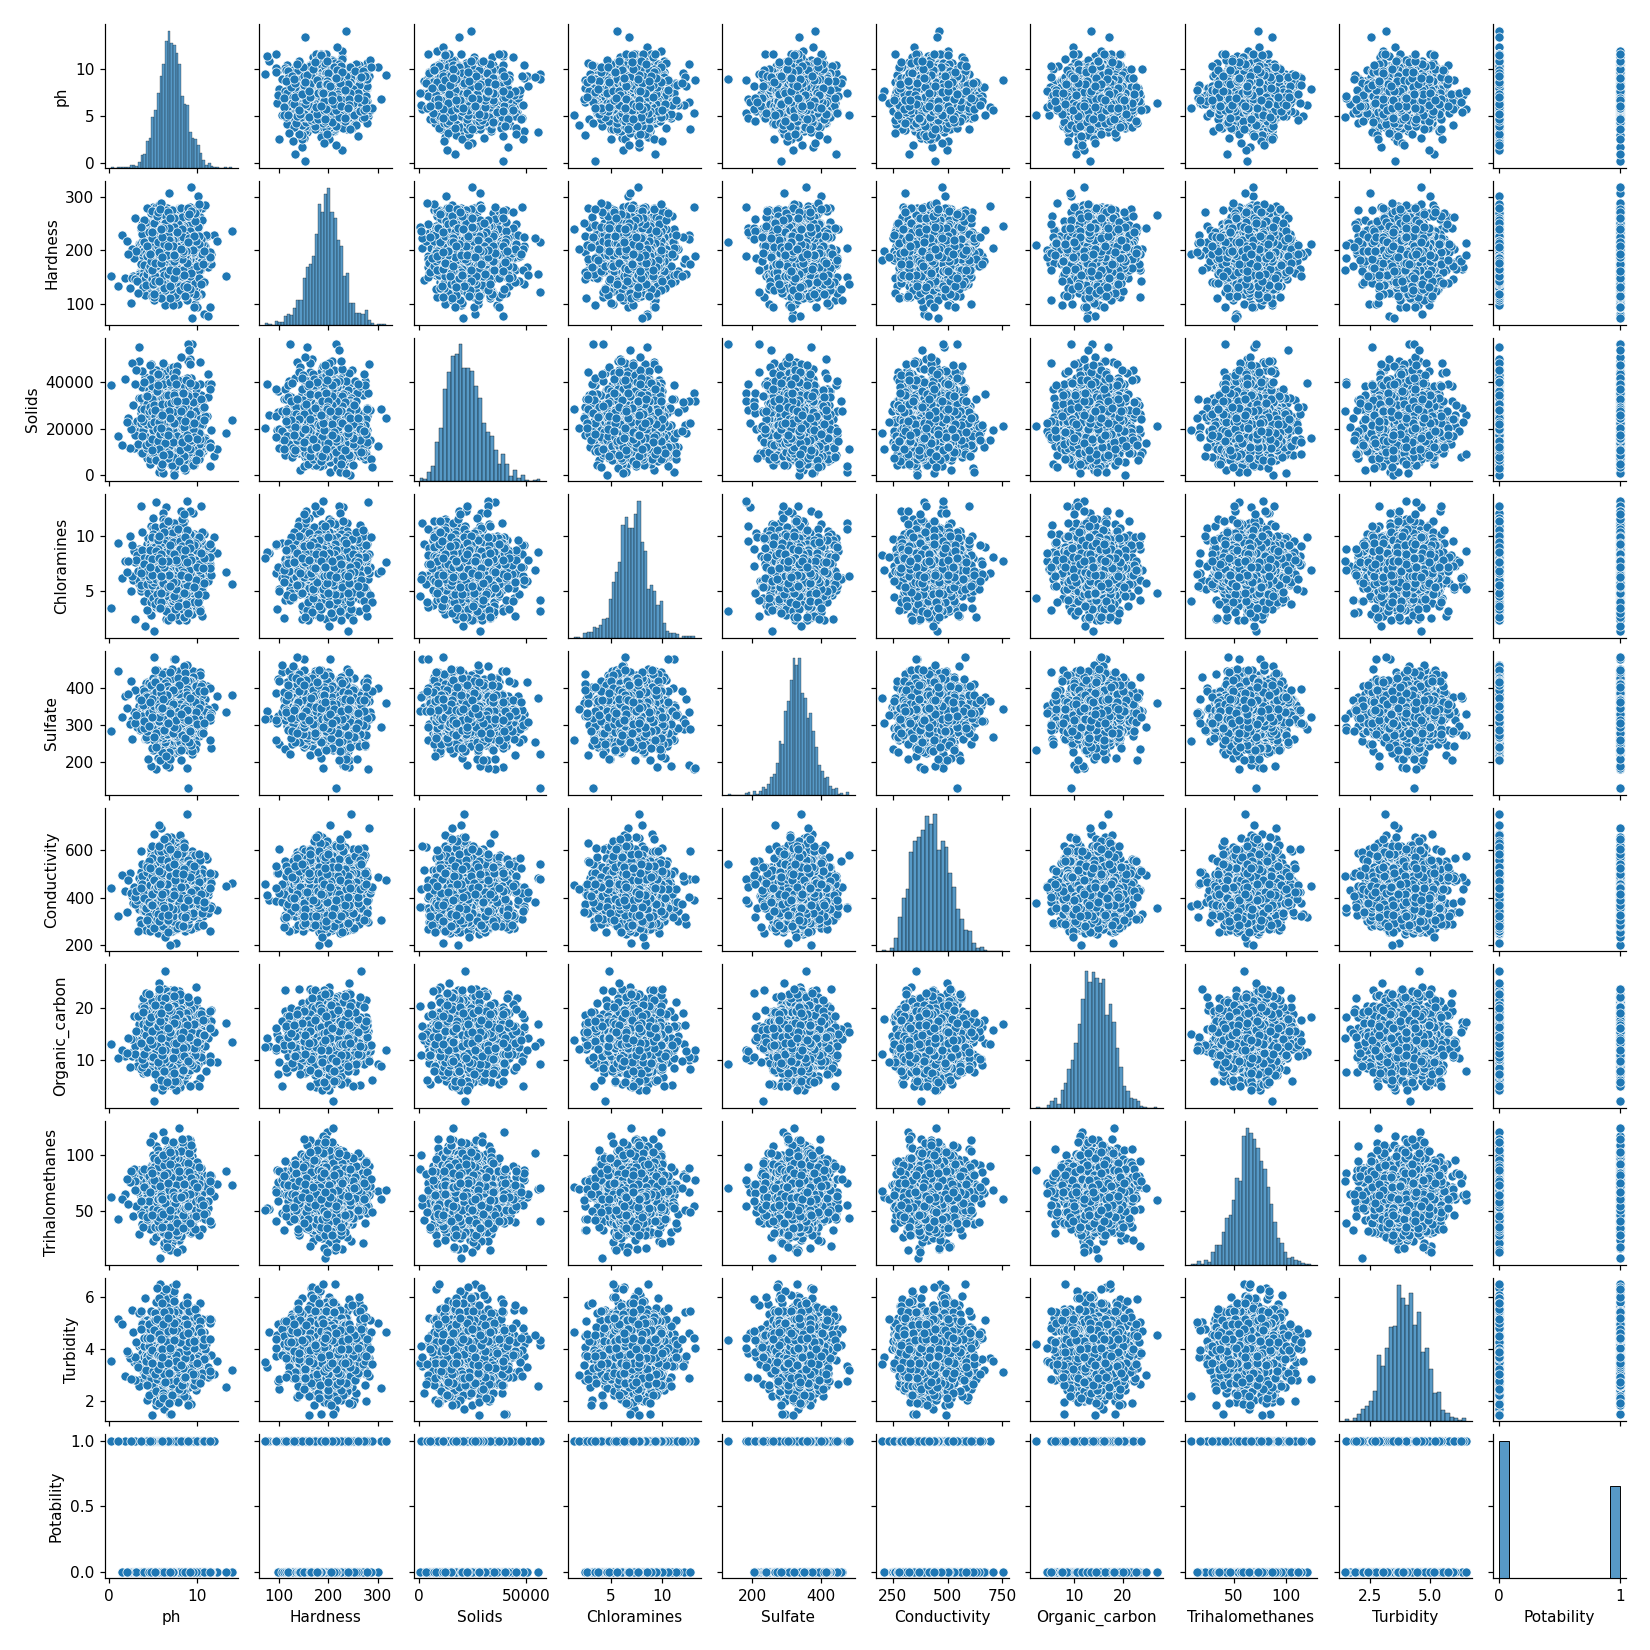

In [122]:
sns.pairplot(dfWater, height=1.5);

### Analise do PairPlot:

Ao analisar os graficos gerados pelo PairPlot, chegamos a conclusao que nenhuma feature esta interligada ou relacionada, forcando-nos a ultilizar um boxplot.

In [64]:
import plotly.express as px

px.box(dfWater, y=['ph', 'Hardness', 'Solids', 'Chloramines',
                   'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'], color='Potability')

#Esta sem escala (utilize zoom)

In [65]:
px.box(dfWater, y=['ph', 'Hardness', 'Chloramines',
                   'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity'], color='Potability')

In [160]:
data = pd.get_dummies(dfWater)
data.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
3   8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4   9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   
5   5.584087  188.313324  28748.687739     7.544869  326.678363    280.467916   
6  10.223862  248.071735  28749.716544     7.513408  393.663396    283.651634   
7   8.635849  203.361523  13672.091764     4.563009  303.309771    474.607645   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  
5        8.399735        54.917862   2.559708           0  
6       13.789695        84.603556   2.672989           0  
7       12.363817        62.798309   4.401425           0

In [155]:
X = data.drop(['Potability'], axis = 1)
Y = data['Potability']


X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.75, random_state=83)


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [163]:
decision_tree = DecisionTreeClassifier(random_state=83)
decision_tree.fit(X_train, y_train)

acc_decision_tree = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree

57.12

In [166]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=83, n_jobs=-1)
random_forest.fit(X_train, y_train)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest

63.35